# colab에서 열기

https://colab.research.google.com/github/SLCFLAB/FinTech2022/blob/main/ML_day5.ipynb

* Ref : https://datascienceschool.net/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Support Vector Machine

### 1)  Basic SVM

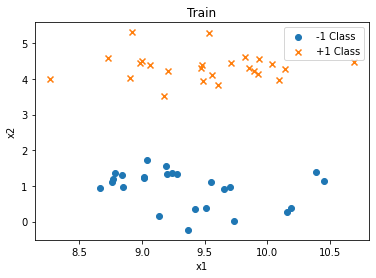

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4) #center의 개수만큼 정규분포를 만든다 (x->data, y->label(0,1))
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 Class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 Class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Train")
plt.show()

In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y) #x라는 데이터를 가지고 y를 학습

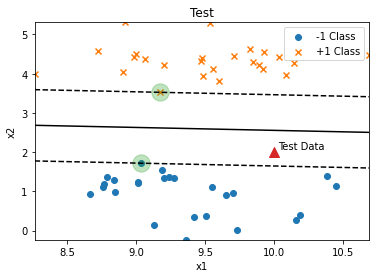

In [5]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0] #지금은 데이터가 두개이기 때문에 decision boundary가 한 개만 존재 
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 Class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 Class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "Test Data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.title("Test")
plt.show()

In [6]:
model.coef_.dot(x_new) + model.intercept_ #새로운 점은 -1에 가깝다

array([-0.61101582])

### 2) With Slack

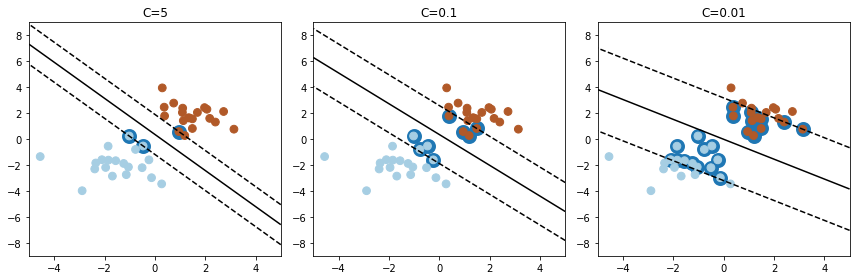

In [ ]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plt.figure(figsize=(12, 4))

plotnum = 1
for name, penalty in (('C=5', 5), ('C=0.1', 0.1), ('C=0.01', 0.01)): #얼마나 트레이닝 에러를 줄이는 데 집중하는가 
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)

    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 3, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.tight_layout()
plt.show()

### 3) With Kernel

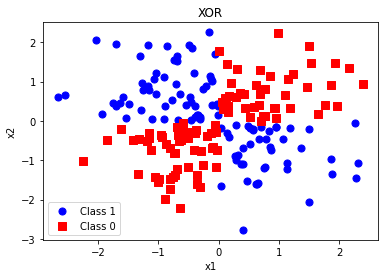

In [7]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='Class 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='Class 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR")
plt.show()

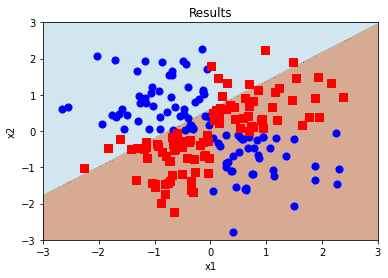

In [8]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap='Paired_r', alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='Class 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='Class 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

from sklearn.svm import SVC

svc = SVC(kernel="linear").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "Results")
plt.show()

In [9]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T #

FunctionTransformer(basis).fit_transform(X)

array([[ 8.54187071e+01,  1.78138775e+01,  1.85752185e+00],
       [ 8.41118183e+01,  4.57177457e+01,  1.24246052e+01],
       [ 7.81923231e+01,  1.61500070e+01,  1.66782822e+00],
       [ 8.33833064e+01,  1.96750189e+00,  2.32124622e-02],
       [ 7.51145772e+01,  1.15209625e+01,  8.83534076e-01],
       [ 7.68900557e+01,  1.48760732e+01,  1.43905186e+00],
       [ 1.09250092e+02,  1.68776946e+01,  1.30369032e+00],
       [ 9.00111895e+01,  5.27322765e+01,  1.54463740e+01],
       [ 9.13619389e+01,  5.55448872e+01,  1.68846816e+01],
       [ 1.00716900e+02,  6.26985465e+01,  1.95156311e+01],
       [ 9.41339963e+01,  1.32780628e+01,  9.36468000e-01],
       [ 9.08766012e+01,  7.13359517e+01,  2.79985053e+01],
       [ 7.93012737e+01,  5.07807951e+01,  1.62588130e+01],
       [ 7.94958077e+01,  6.69235464e+01,  2.81697941e+01],
       [ 8.87466351e+01,  4.53198130e+00,  1.15716244e-01],
       [ 9.12623497e+01,  1.50067128e+01,  1.23381345e+00],
       [ 8.12699341e+01,  1.55012715e+01

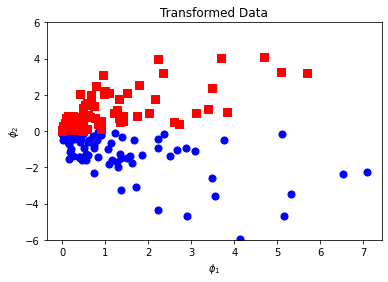

In [ ]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor == 1, 0], X_xor2[y_xor == 1, 1], c="b", marker='o', s=50)
plt.scatter(X_xor2[y_xor == 0, 0], X_xor2[y_xor == 0, 1], c="r", marker='s', s=50)
plt.ylim(-6, 6)
plt.title("Transformed Data")
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.show()

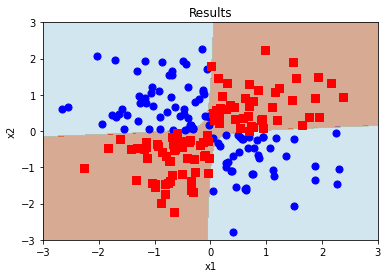

In [ ]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([("basis", FunctionTransformer(basis)), 
                       ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "Results")
plt.show()

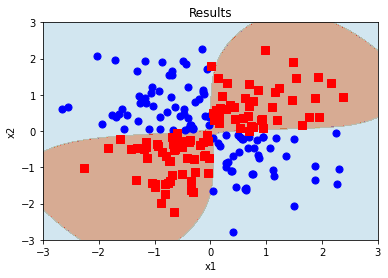

In [ ]:
from sklearn.pipeline import Pipeline

kernelmodel = SVC(kernel="rbf").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, kernelmodel, "Results")
plt.show()

# Optimization (참고)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
def f(x, y):
    return x ** 2 + y ** 2

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

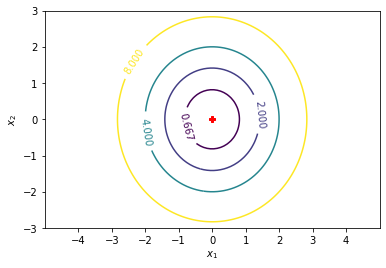

In [ ]:
plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

CS = plt.contour(X, Y, Z, levels=[2/3, 2, 4, 8])
plt.clabel(CS, fontsize=10)
plt.plot([0], [0], 'rP') # Zero

plt.show()

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [ ]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=[
    go.Surface(x=X, y=Y, z=Z)
])

# fig.show()
fig.show(renderer="colab")

In [ ]:
import scipy as sp
from scipy import optimize

In [ ]:
def farray(x):
    return 2*x[0]**2 + x[1]** 2 # 2x^2 + y^2

sp.optimize.fmin_slsqp(farray, np.array([1, 1]))
# 왜 초기값이 필요한가?
# Python : 수학적인 분석을 어려워함 < 사람 : f_x, f_y, D  계산
# Gradient Descent! -> (1) 초기 위치 (2) 기울기 -> 기울기의 반대방향으로 감!

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.828482398889041e-17
            Iterations: 3
            Function evaluations: 14
            Gradient evaluations: 3


array([-6.52673160e-09, -3.61778568e-09])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x, y):
    return 4*(y**3) + (x**2) - 12*(y**2) - 36*y + 2

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

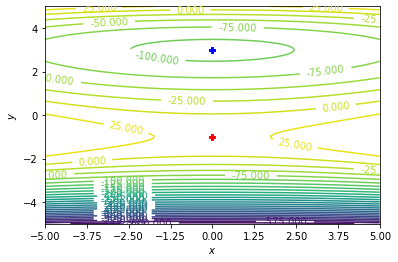

In [ ]:
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-5, 5, 9))
plt.xlabel("$x$")
plt.ylabel("$y$")

CS = plt.contour(X, Y, Z, 30)
plt.clabel(CS, fontsize=10)
plt.plot([0], [3], 'bP') # Zero
plt.plot([0], [-1], 'rP') # Zero

plt.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=[
    go.Surface(x=X, y=Y, z=Z)
])

# fig.show()
fig.show(renderer="colab")

In [ ]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=[
                    go.Surface(x=X, y=Y, z=Z),
                    go.Scatter3d(x=[0], y=[3], z=[f(0, 3)],
                                marker=dict(
                                    size=3,
                                    color='black',
                                    opacity=0.8
                                )),
                    go.Scatter3d(x=[0], y=[-1], z=[f(0, -1)],
                                marker=dict(
                                    size=3,
                                    color='black',
                                    opacity=0.8
                                ))
                ])

# fig.show()
fig.show(renderer="colab")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x1, x2) :
    return 2*(x1**2) + x2**2

def g(x1) :
    return 1 - x1

In [ ]:
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

# constraint function g(x) = x1 + x2 - 1 = 0
x2_g = g(x1)

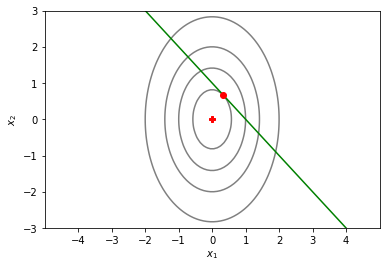

In [ ]:
plt.contour(X1, X2, Y, colors="gray", levels=[2/3, 2, 4, 8])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP') # Zero
plt.plot([1/3], [2/3], 'ro') # Answer

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
import scipy as sp
from scipy import optimize

In [ ]:
def farray(x):
    return 2*x[0]**2 + x[1]**2

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(farray, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6666666666666667
            Iterations: 4
            Function evaluations: 16
            Gradient evaluations: 4


array([0.33333333, 0.66666667])

In [ ]:
def f(x1, x2):
    return (x1 - 2) ** 2 + 2*(x2 - 1) ** 2

def g1(x1):
    return (3-x1)/4

def g2(x1):
    return x1 

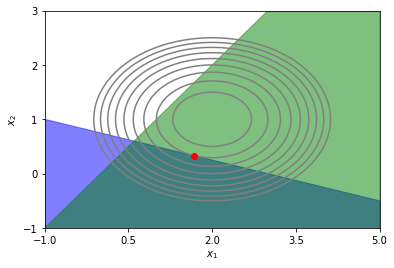

In [ ]:
x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

x2_g1 = g1(x1)
x2_g2 = g2(x1)

plt.contour(X1, X2, Y, colors="gray",
            levels=np.arange(0, 5, 0.5))

plt.plot([5/3], [1/3], 'ro') # Answer

ax = plt.gca()
ax.fill_between(x1, x2_g1, -100, color='b', alpha=0.5)
ax.fill_between(x1, x2_g2, -100, color='g', alpha=0.5)

plt.xlim(-1, 5)
plt.ylim(-1, 3)
plt.xticks(np.linspace(-1, 5, 5))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
def farray(x):
    return (x[0] - 2) ** 2 + 2*(x[1] - 1) ** 2

def ieq_constraint1(x):
    return 3-(x[0]+4*x[1]) # >=0

def ieq_constraint2(x):
    return x[0]-x[1] # >=0

sp.optimize.fmin_slsqp(farray, np.array([0, 0]), ieqcons=[ieq_constraint1, ieq_constraint2])


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0000000000000053
            Iterations: 4
            Function evaluations: 16
            Gradient evaluations: 4


array([1.66666666, 0.33333333])

# Decision Tree

In [10]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) #설정하지 않았으면 gini(Gini impurity)가 default 
tree_clf.fit(X, y) ##데이터에 맞는 모델 자동으로 생성해줌

DecisionTreeClassifier(max_depth=2, random_state=42)

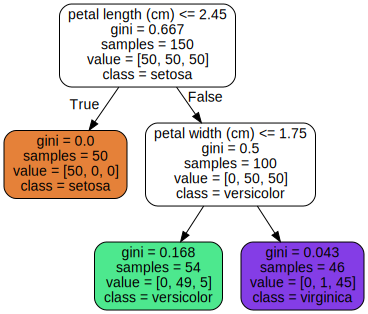

In [12]:
from graphviz import Source
from sklearn.tree import export_graphviz #시각화 툴 (아래 tree를 보기 쉽게 그려줌)

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot")) ##fetal length와 width만을 가지고 분류 

그림 저장: decision_tree_decision_boundaries_plot


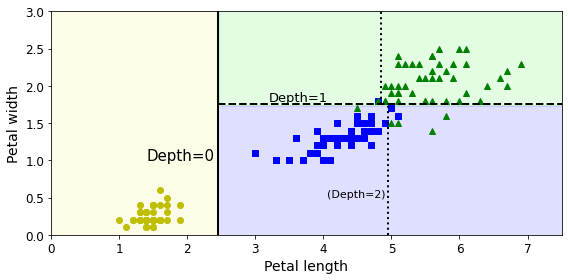

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    y_pred = clf.predict(X_new).reshape(x1.shape) #predict 함수를 사용해서 y_prediction 값을 얻음
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y) ## decision boundary 그려줌 (위의 plot_decision_boundary 함수 활용)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [14]:
tree_clf.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [15]:
tree_clf.predict([[5, 1.5]])


array([1])

# Regression Tree

In [16]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

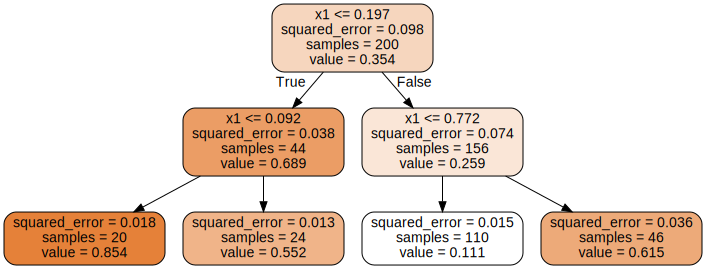

In [18]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

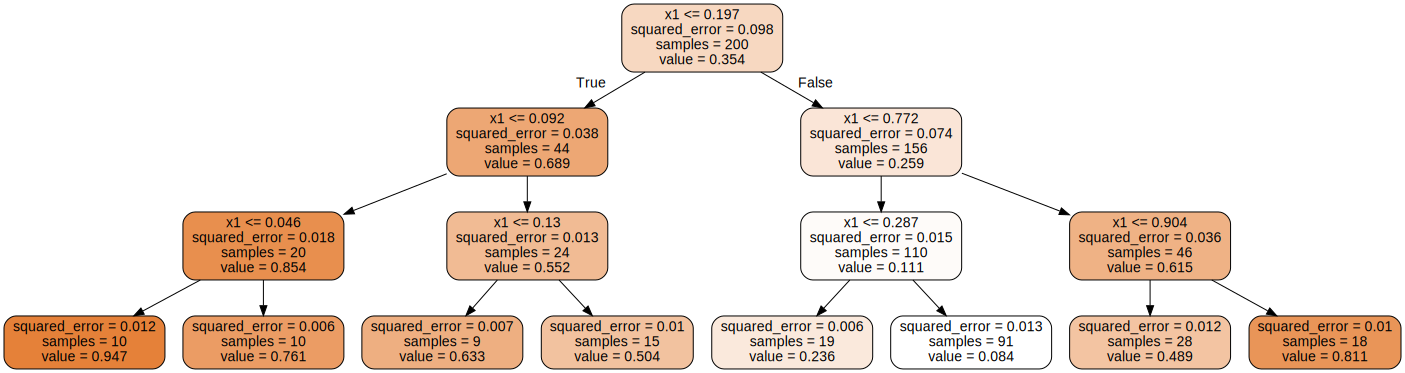

In [19]:
export_graphviz(
        tree_reg2,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))
